In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
# NOTE: Running the model.weights command will throw an error if the input shape is not specified in the first layer of the model, as the model doesn't know
# how many parameters it would contain.
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(16, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10),
                    Softmax() 
])

In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
# NOTE that it is compulsory to indicate the number of channels in the input shape when passing it as an argument in the Conv2D layer
model = Sequential([
                    Conv2D(16, 3, activation = 'relu', input_shape = (28,28,1), data_format = 'channels_last'),
                    MaxPooling2D(3),
                    Flatten(),
                    Dense(10, activation = 'softmax')
])


In [7]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
# NOTE: Sparse categorical crossentropy - Used when the labels are integers; Categorical crossentropy - Used when the labels are one-hot encoded 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy', 'mae'])


In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)


(60000, 28, 28)
(60000,)


In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [ ]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255
test_images = test_images/255

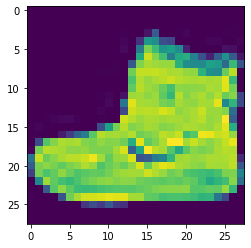

Ankle boot


In [18]:
# Display one of the images
plt.imshow(train_images[0, :, :])
plt.show()
print(f"{labels[train_labels[0]]}")

#### Fit the model

In [25]:
# Fit the model
# NOTE: The dimensions of the train_images is (No of samples, px, py). We have to convert it into (No of samples, px, py, no of channels) aso our Conv2D
# compulsorily requires the channel parameter
history = model.fit(train_images[..., np.newaxis], train_labels, epochs = 6, batch_size = 32)

Epoch 1/6
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3024 - accuracy: 0.8880 - mae: 4.4200
Epoch 2/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3002 - accuracy: 0.8880 - mae: 4.4200
Epoch 3/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2955 - accuracy: 0.8893 - mae: 4.4200
Epoch 4/6
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2940 - accuracy: 0.8899 - mae: 4.4200
Epoch 5/6
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2937 - accuracy: 0.8907 - mae: 4.4200
Epoch 6/6
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2916 - accuracy: 0.8914 - mae: 4.4200


#### Plot training history

In [26]:
# Load the history into a pandas Dataframe.
# NOTE: The history object has an attribute also called history which is basically a dictionary which contains the loss and metrics valuesf for all the epochs
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.302415,0.888033,4.420005
1,0.300156,0.888000,4.420010
2,0.295526,0.889283,4.420012
3,0.293958,0.889883,4.420010
4,0.293707,0.890667,4.420008


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

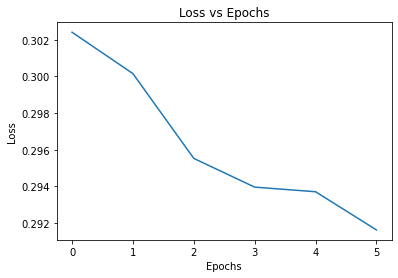

In [29]:
# Make a plot for the loss
loss_plot = df.plot(y = 'loss', title = 'Loss vs Epochs', legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

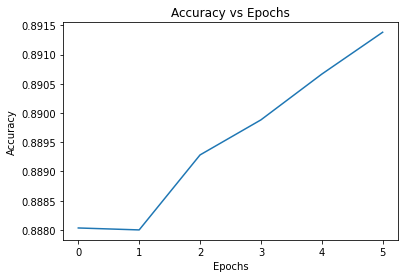

In [31]:
# Make a plot for the accuracy
accuracy_plot = df.plot(y = 'accuracy', title = 'Accuracy vs Epochs', legend = False)
accuracy_plot.set(xlabel = 'Epochs', ylabel = 'Accuracy')

[Text(0, 0.5, 'Mean absolute error'), Text(0.5, 0, 'Epochs')]

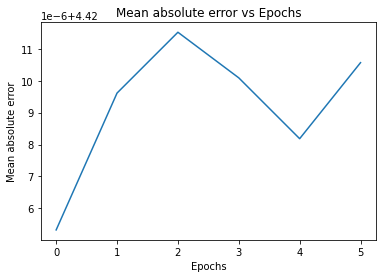

In [32]:
# Make a plot for the additional metric
accuracy_plot = df.plot(y = 'mae', title = 'Mean absolute error vs Epochs', legend = False)
accuracy_plot.set(xlabel = 'Epochs', ylabel = 'Mean absolute error')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [34]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose = 2)


313/313 - 1s - loss: 0.4110 - accuracy: 0.8688 - mae: 4.4200


#### Make predictions from the model

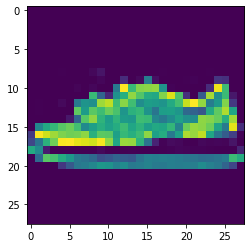

Label: Sneaker


In [38]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [50]:
# Get the model predictions
prediction = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model prediction: {labels[np.argmax(prediction)]}")

Model prediction: Sneaker
